<a href="https://colab.research.google.com/github/FelixOgero/Analysis-of-Company-Stocks/blob/main/S%26P500StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install scikit learn
!pip install scikit-learn

In [ ]:
# Import the necessary libraries
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
# Download the S&P500 data
data = yf.download("^GSPC", start="1990-01-01", end="2024-01-01")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [ ]:
# Descriptive statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8.565000e+03
mean,1583.568097,1592.942337,1573.574951,1583.898693,1583.898693,2.459029e+09
std,1089.338157,1095.204538,1083.145746,1089.516200,1089.516200,1.849476e+09
min,295.450012,301.450012,294.510010,295.459991,295.459991,1.499000e+07
25%,894.739990,905.840027,883.020020,896.140015,896.140015,6.428000e+08
50%,1267.930054,1275.800049,1259.869995,1267.650024,1267.650024,2.494590e+09
75%,2048.639893,2061.229980,2041.099976,2049.800049,2049.800049,3.831020e+09
max,4804.509766,4818.620117,4780.979980,4796.560059,4796.560059,1.145623e+10


<Axes: xlabel='Date'>

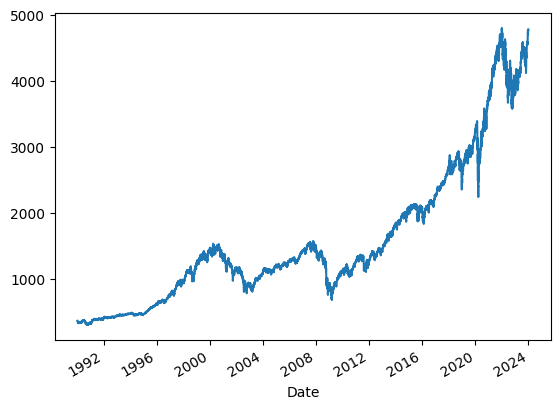

In [ ]:
# Plot the close price
data["Close"].plot()

In [ ]:
# Split the data into train and test data tests
train_data = data.iloc[:int(.95 * len(data)), :]
test_data = data.iloc[int(.95 * len(data)):, :]

In [ ]:
# Define the features and target variable
features = ['Open', 'High', 'Low']
target = 'Close'

In [ ]:
# Create and train the model XGB
model1 = xgb.XGBRegressor()
model1.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make the predictions
predictions = model1.predict(test_data[features])
print('Model Predictions: ')
print(predictions)

Model Predictions: 
[4395.7505 4435.5894 4459.449  4402.786  4329.3555 4233.2793 4191.044
 4246.757  4233.2793 4191.044  4059.0417 4164.9663 4246.757  4191.044
 4059.0417 3958.1309 3958.1309 3958.1309 3850.3723 3958.1309 3958.1309
 3958.1309 3958.1309 3904.8806 3850.3723 3958.1309 3850.3723 3958.1309
 3958.1309 4089.8508 4164.9663 4059.0417 4089.8508 4164.9663 4164.9663
 4089.8508 4164.9663 4094.255  3958.1309 3833.0667 3693.0825 3758.9297
 3693.0825 3693.0825 3693.0825 3758.9297 3833.0667 3833.0667 3958.1309
 3850.3723 3833.0667 3833.0667 3833.0667 3833.0667 3833.0667 3833.0667
 3833.0667 3833.0667 3833.0667 3833.0667 3758.9297 3833.0667 3833.0667
 3904.8806 3958.1309 3958.1309 3958.1309 3958.1309 3958.1309 3958.1309
 3958.1309 4089.8508 4164.9663 4059.0417 4164.9663 4164.9663 4164.9663
 4164.9663 4164.9663 4164.9663 4233.2793 4233.2793 4233.2793 4334.0205
 4233.2793 4233.2793 4233.2793 4164.9663 4164.9663 4164.9663 4164.9663
 4059.0417 3958.1309 3958.1309 3958.1309 3958.1309 3958.130

In [ ]:
# Show the actual values
print('Actual Values: ')
print(test_data[target])

Actual Values: 
Date
2022-04-18    4391.689941
2022-04-19    4462.209961
2022-04-20    4459.450195
2022-04-21    4393.660156
2022-04-22    4271.779785
                 ...     
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Close, Length: 429, dtype: float64


In [ ]:
# Model accuracy
accuracy = model1.score(test_data[features], test_data[target])
print('Accuracy: ')
print(accuracy)

Accuracy: 
0.9726964698023663


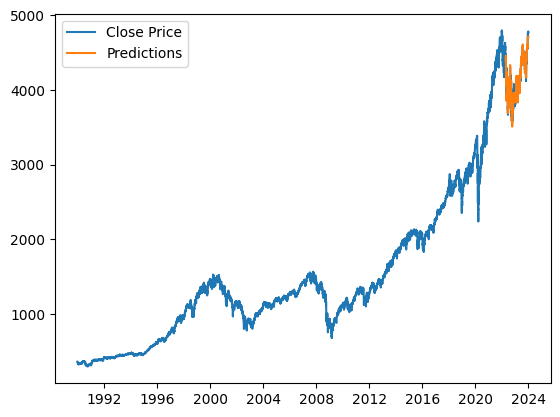

In [ ]:
# Plot the predictions and close price
plt.plot(data['Close'], label='Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()

In [ ]:
# Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Fit and train the model
model2 = LinearRegression()
model2.fit(train_data[features], train_data[target])

LinearRegression()

In [ ]:
# show the predictions and actual values
pred = model2.predict(test_data[features])
print("Prediction: ")
print(pred)
print("Actual Values: ")
print(test_data[target])

Prediction: 
[4395.36073655 4462.57055015 4467.75748401 4427.5537986  4292.18290546
 4251.24497676 4196.42436745 4216.2655287  4272.66410865 4165.55521082
 4111.77987858 4185.67039645 4269.11713095 4140.32802911 4106.82023629
 3997.44706085 4004.32590684 3994.474953   3922.77405725 4030.99936692
 4019.84799182 4072.22204705 3941.10943335 3923.21253166 3848.84057447
 3967.07193825 3900.55541576 3988.38119411 4065.69219877 4149.98906038
 4129.78959143 4104.58775455 4152.30038886 4111.11145829 4144.84985022
 4144.78553265 4126.9791763  4050.33524669 3915.47888754 3755.87694015
 3730.74344243 3796.89875523 3658.09901117 3680.28318285 3772.85940074
 3781.85671251 3774.84281128 3904.07810349 3902.14605539 3868.94690421
 3814.45496088 3778.00764288 3801.78145702 3787.99631155 3848.82579225
 3905.09188567 3900.19749884 3854.00211745 3831.79246274 3807.85530405
 3759.34638794 3858.05797025 3848.8164253  3931.52508234 3959.40390223
 3972.58503603 3963.68555085 3956.43457791 3919.36409263 4030.35

In [ ]:
# Get the accuracy of the model
accuracyScore = model2.score(train_data[features], train_data[target])
print(accuracyScore)
accuracyMetric = metrics.r2_score(test_data[target], pred)
print(f'Accuracy of the model: {accuracyMetric * 100:.2f}%')

0.9999469836153057
Accuracy of the model: 99.68%


In [ ]:
# Tensorflow neural network algorithm
!pip install tensorflow

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# Select features (X) and target variable (y)
featuresX = ['Open', 'High', 'Low']
targetY = 'Close'

X = data[features].values
y = data[target].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
215/215 [==============================] - 6s 9ms/step - loss: 0.0066 - val_loss: 1.0803e-05
Epoch 2/50
215/215 [==============================] - 1s 5ms/step - loss: 1.1701e-05 - val_loss: 9.1151e-06
Epoch 3/50
215/215 [==============================] - 1s 4ms/step - loss: 1.1782e-05 - val_loss: 9.0573e-06
Epoch 4/50
215/215 [==============================] - 1s 3ms/step - loss: 1.1983e-05 - val_loss: 1.1563e-05
Epoch 5/50
215/215 [==============================] - 1s 4ms/step - loss: 1.1652e-05 - val_loss: 8.9273e-06
Epoch 6/50
215/215 [==============================] - 1s 3ms/step - loss: 1.1198e-05 - val_loss: 1.1886e-05
Epoch 7/50
215/215 [==============================] - 1s 3ms/step - loss: 1.1183e-05 - val_loss: 1.1457e-05
Epoch 8/50
215/215 [==============================] - 0s 2ms/step - loss: 1.1191e-05 - val_loss: 9.6684e-06
Epoch 9/50
215/215 [==============================] - 1s 3ms/step - loss: 1.1431e-05 - val_loss: 8.9293e-06
Epoch 10/50
215/215 [===========

In [ ]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

54/54 [==============================] - 0s 1ms/step


In [ ]:
# Inverse transform to get back the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
# Print the predictions and actual values
print("Predictions: ")
print(y_pred)
print("Actual values: ")
print(y_test_orig)

Predictions: 
[[1964.9492 ]
 [ 887.26776]
 [2840.1353 ]
 ...
 [4182.5166 ]
 [ 419.2603 ]
 [1192.1168 ]]
Actual values: 
[[1957.2199707 ]
 [ 878.28997803]
 [2822.23999023]
 ...
 [4164.66015625]
 [ 413.5       ]
 [1186.86999512]]


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test_orig, y_pred)
print(f'Mean Squared Error on the test set: {mse:.2f}')

# Determine the accuracy of the model
accuracyNeural = metrics.r2_score(y_test_orig, y_pred)
print(f"The accuracy is {accuracy * 100:.4f}%")

Mean Squared Error on the test set: 233.51
The accuracy is 97.2696%
